In [347]:
import warnings
warnings.filterwarnings('ignore')

In [348]:
import pandas as pd
import numpy as np

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [350]:
df1=pd.read_csv('titanic1.csv')

In [351]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
df1.shape

(569, 12)

In [353]:
df=df1

In [354]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
566,567,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,349205,7.8958,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C


In [355]:
df.drop(['Name','Ticket'],axis=1,inplace=True)   #dropped name and ticket column as it has no relation with predicting values

In [356]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [357]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  569 non-null    int64  
 1   Survived     569 non-null    int64  
 2   Pclass       569 non-null    int64  
 3   Sex          569 non-null    object 
 4   Age          450 non-null    float64
 5   SibSp        569 non-null    int64  
 6   Parch        569 non-null    int64  
 7   Fare         569 non-null    float64
 8   Cabin        128 non-null    object 
 9   Embarked     568 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 44.6+ KB


In [359]:
from sklearn.preprocessing import LabelEncoder

In [360]:
le=LabelEncoder()

In [361]:
df['Embarked']=le.fit_transform(df['Embarked'].astype(str))

In [362]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,2
1,2,1,1,female,38.0,1,0,71.2833,C85,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,2
3,4,1,1,female,35.0,1,0,53.1000,C123,2
4,5,0,3,male,35.0,0,0,8.0500,NaN,2


In [363]:
df['Sex']=le.fit_transform(df['Sex'])

In [364]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,NaN,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,NaN,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,NaN,2


In [365]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16'], dtype=object)

In [366]:
from sklearn.impute import SimpleImputer

In [367]:
imp=SimpleImputer(strategy='most_frequent')

In [368]:
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))

In [369]:
df['Cabin']

0      C23 C25 C27
1              C85
2      C23 C25 C27
3             C123
4      C23 C25 C27
          ...     
564    C23 C25 C27
565    C23 C25 C27
566    C23 C25 C27
567    C23 C25 C27
568    C23 C25 C27
Name: Cabin, Length: 569, dtype: object

In [370]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,C23 C25 C27,2
1,2,1,1,0,38.0,1,0,71.2833,C85,0
2,3,1,3,0,26.0,0,0,7.9250,C23 C25 C27,2
3,4,1,1,0,35.0,1,0,53.1000,C123,2
4,5,0,3,1,35.0,0,0,8.0500,C23 C25 C27,2


In [371]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked         int32
dtype: object

In [372]:
df['Cabin']=le.fit_transform(df['Cabin'])

In [373]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,42,2
1,2,1,1,0,38.0,1,0,71.2833,54,0
2,3,1,3,0,26.0,0,0,7.9250,42,2
3,4,1,1,0,35.0,1,0,53.1000,36,2
4,5,0,3,1,35.0,0,0,8.0500,42,2


In [374]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  569 non-null    int64  
 1   Survived     569 non-null    int64  
 2   Pclass       569 non-null    int64  
 3   Sex          569 non-null    int32  
 4   Age          450 non-null    float64
 5   SibSp        569 non-null    int64  
 6   Parch        569 non-null    int64  
 7   Fare         569 non-null    float64
 8   Cabin        569 non-null    int32  
 9   Embarked     569 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 37.9 KB


In [376]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

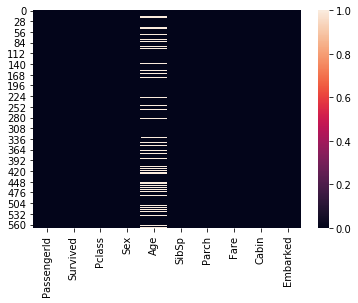

In [377]:
sns.heatmap(df.isnull())

In [378]:
df["Age"]=df["Age"].replace(np.NaN,df["Age"].median())

In [379]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,7.2500,42,2
1,2,1,1,0,38.0,1,0,71.2833,54,0
2,3,1,3,0,26.0,0,0,7.9250,42,2
3,4,1,1,0,35.0,1,0,53.1000,36,2
4,5,0,3,1,35.0,0,0,8.0500,42,2


In [380]:
#df.drop("PassengerId",axis=1,inplace=True)
#df.head()

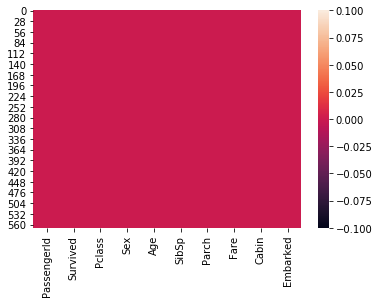

In [381]:
sns.heatmap(df.isnull())

In [382]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [383]:
df.skew()

PassengerId    0.000000
Survived       0.459161
Pclass        -0.644212
Sex           -0.528461
Age            0.493707
SibSp          3.440441
Parch          2.417980
Fare           4.174233
Cabin          1.390559
Embarked      -1.215216
dtype: float64

In [384]:
corr=df.corr()

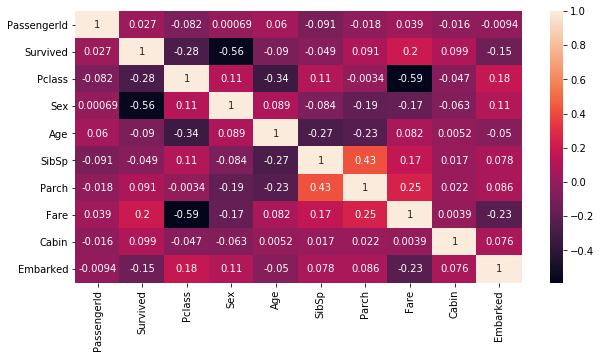

In [385]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [386]:
x=df.drop("Survived",axis=1)

In [387]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,1,22.0,1,0,7.2500,42,2
1,2,1,0,38.0,1,0,71.2833,54,0
2,3,3,0,26.0,0,0,7.9250,42,2
3,4,1,0,35.0,1,0,53.1000,36,2
4,5,3,1,35.0,0,0,8.0500,42,2
...,...,...,...,...,...,...,...,...,...
564,565,3,0,28.0,0,0,8.0500,42,2
565,566,3,1,24.0,2,0,24.1500,42,2
566,567,3,1,19.0,0,0,7.8958,42,2
567,568,3,0,29.0,0,4,21.0750,42,2


In [388]:
y=df["Survived"].values

In [389]:
y=y.reshape(-1,1)

In [390]:
y.shape

(569, 1)

In [391]:
x.shape

(569, 9)

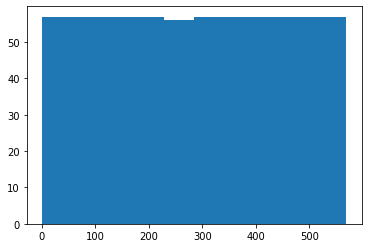

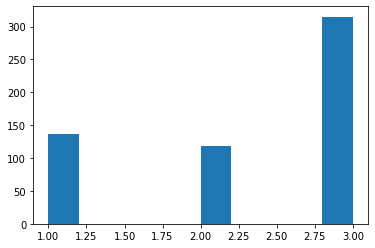

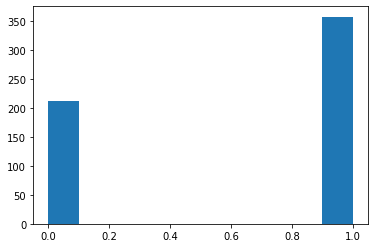

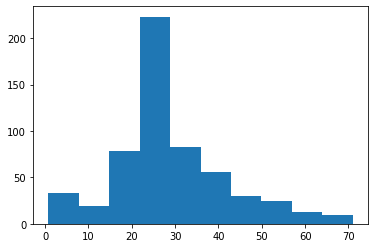

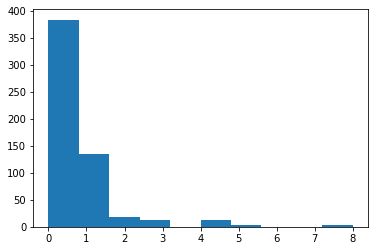

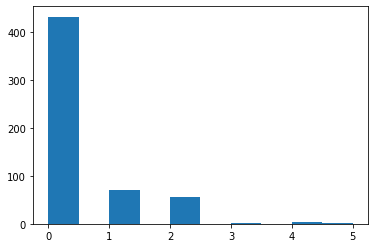

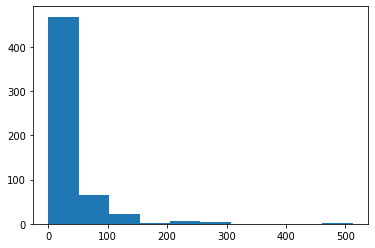

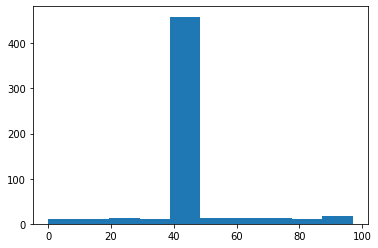

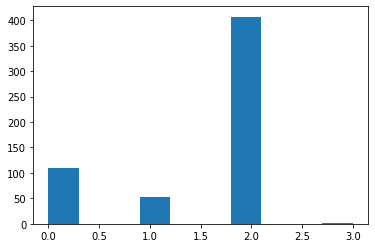

In [392]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

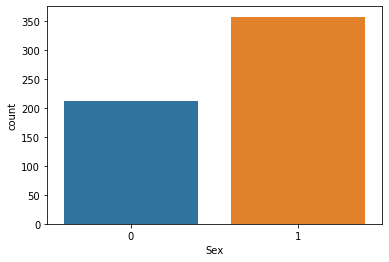

In [393]:
sns.countplot(df["Sex"])

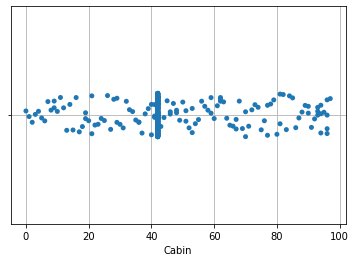

In [394]:
sns.stripplot(df["Cabin"])
plt.grid()

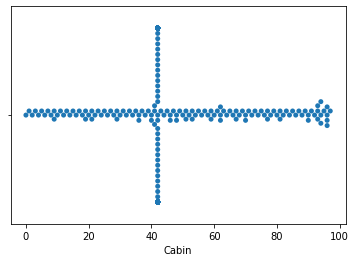

In [395]:
sns.swarmplot(df["Cabin"])

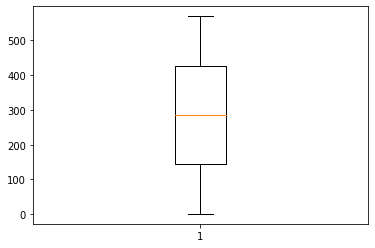

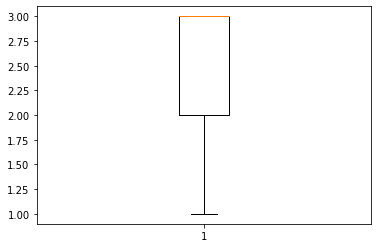

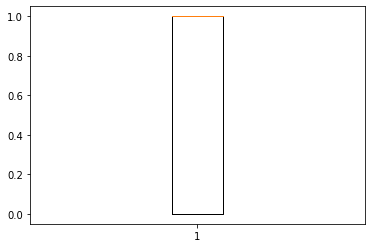

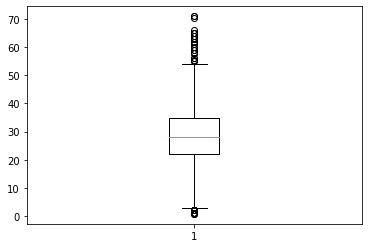

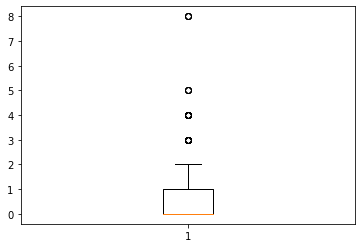

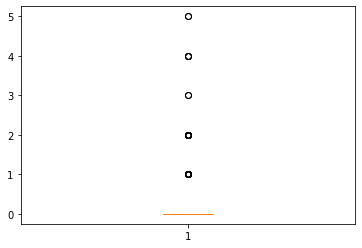

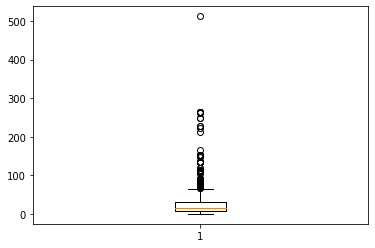

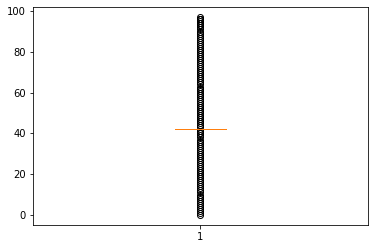

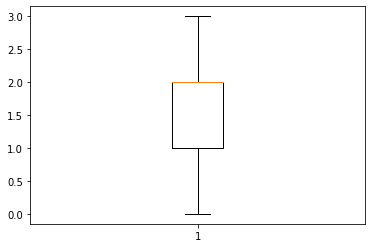

In [396]:
for i in x.columns:
    plt.figure()
    plt.boxplot(x[i])

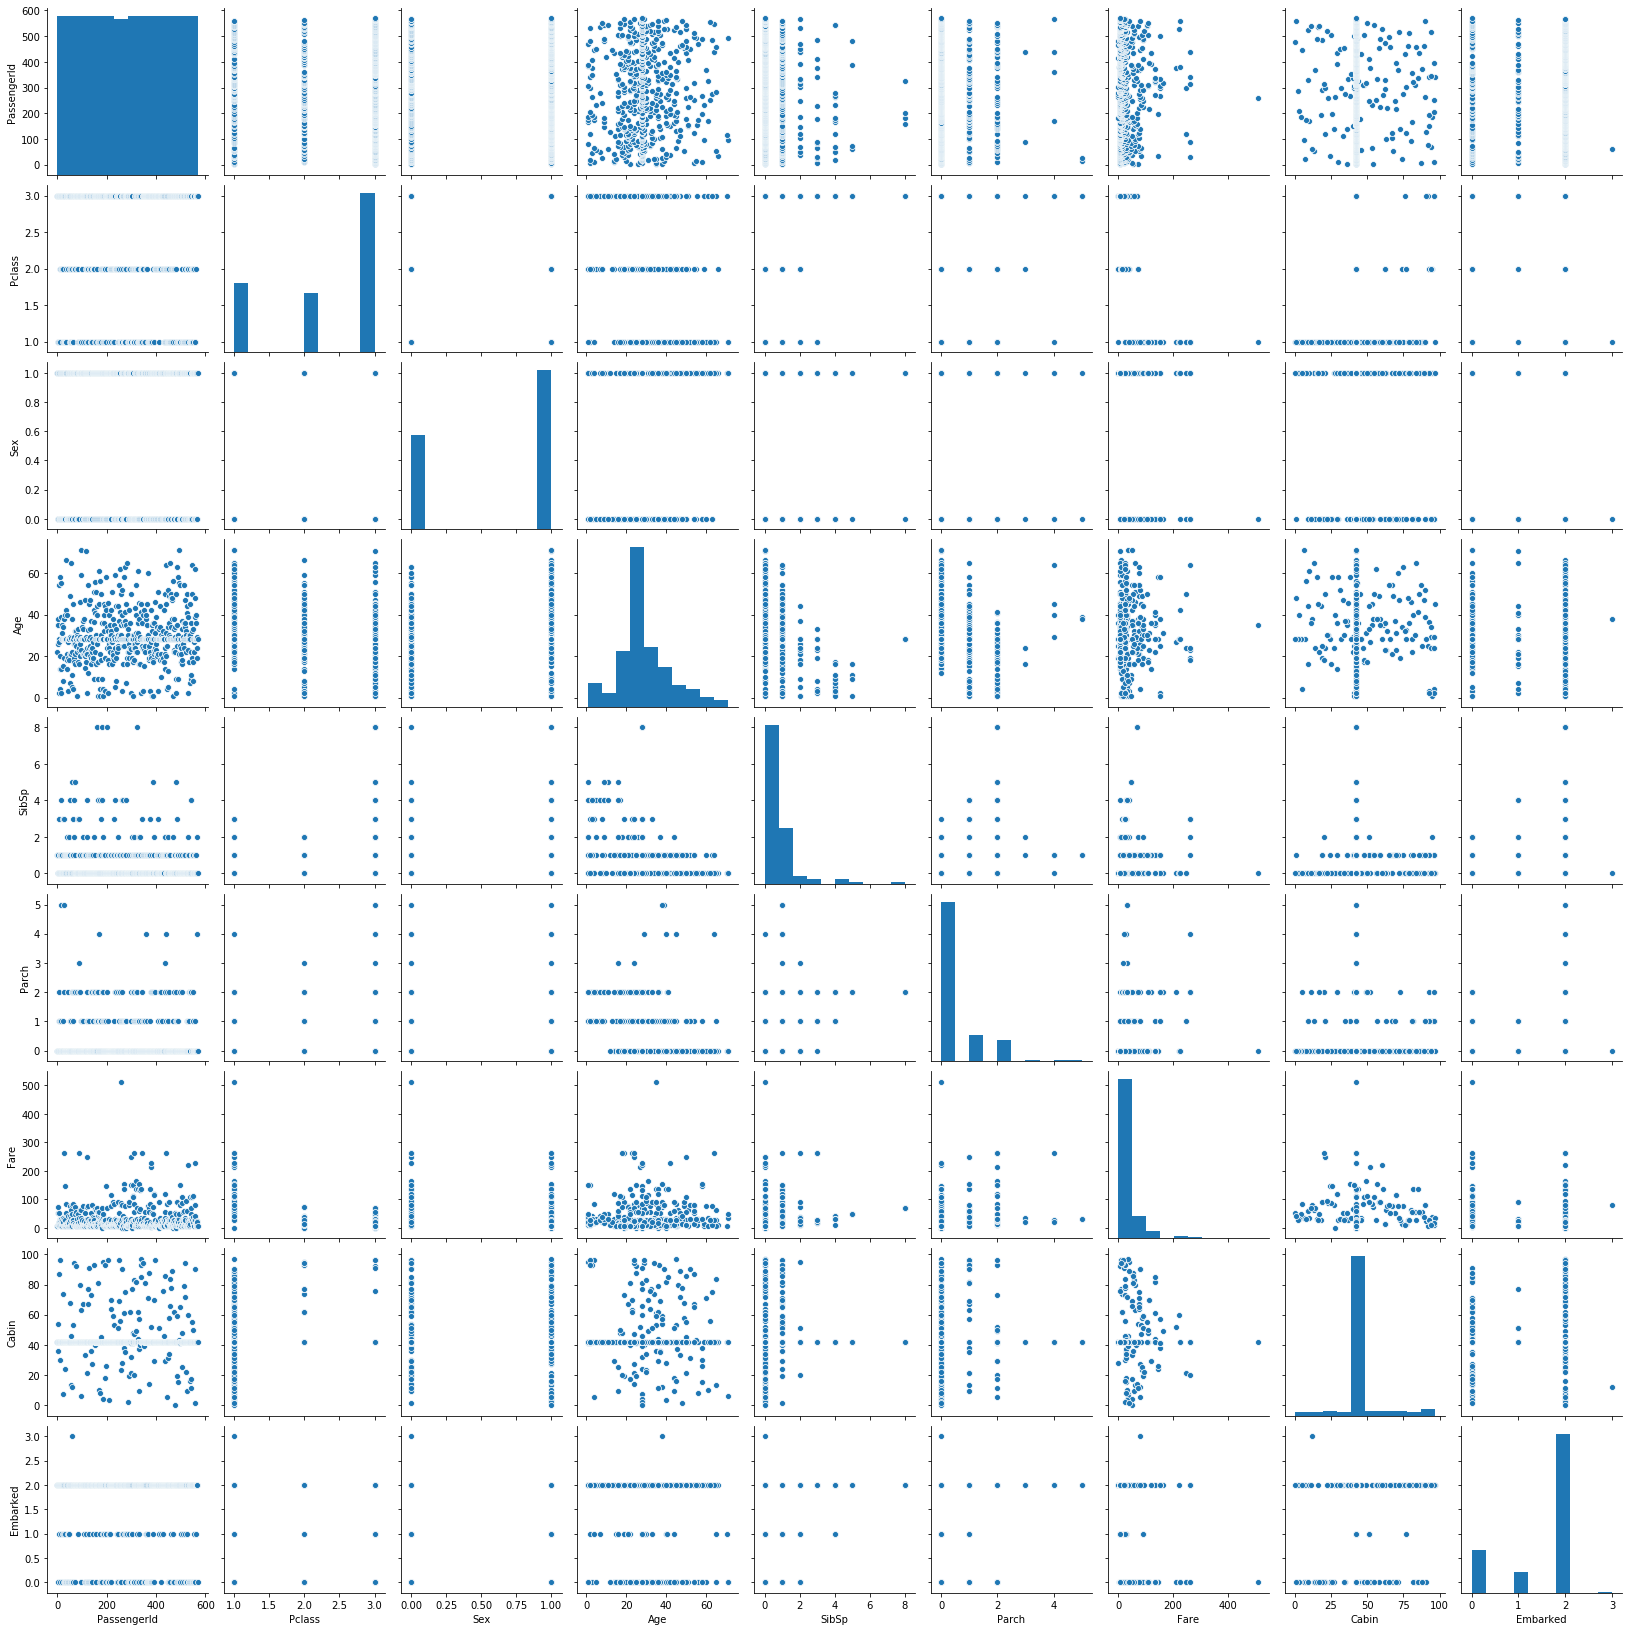

In [397]:
sns.pairplot(x)

In [398]:
from scipy.stats import zscore

In [399]:
#calculating z score

In [400]:
z=np.abs(zscore(x))

In [401]:
z

array([[1.72900945, 0.82296431, 0.77060855, ..., 0.52712818, 0.14777686,
        0.59285051],
       [1.72292139, 1.57840335, 1.29767572, ..., 0.83391046, 0.71685073,
        1.91519367],
       [1.71683333, 0.82296431, 1.29767572, ..., 0.51278094, 0.14777686,
        0.59285051],
       ...,
       [1.71683333, 0.82296431, 0.77060855, ..., 0.5134016 , 0.14777686,
        0.59285051],
       [1.72292139, 0.82296431, 1.29767572, ..., 0.23327547, 0.14777686,
        0.59285051],
       [1.72900945, 0.82296431, 0.77060855, ..., 0.52757029, 0.14777686,
        1.91519367]])

In [402]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 284, 299,
       311, 324, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394, 434,
       437, 438, 438, 462, 475, 480, 493, 516, 527, 541, 542, 556, 557,
       558, 567], dtype=int64), array([7, 7, 5, 4, 5, 6, 4, 4, 7, 4, 4, 7, 5, 6, 3, 3, 6, 4, 7, 7, 4, 4,
       5, 4, 4, 4, 7, 7, 4, 7, 4, 7, 6, 4, 7, 4, 4, 7, 6, 6, 4, 7, 7, 6,
       7, 5, 7, 6, 6, 4, 7, 7, 5, 5, 6, 7, 7, 4, 3, 7, 6, 4, 4, 7, 6, 7,
       5], dtype=int64))


In [403]:
z[6][7]

3.094576582488235

In [404]:
x_new=x[(z<3).all(axis=1)]

In [405]:
x.shape

(569, 9)

In [406]:
x_new.shape    #outliers removed

(503, 9)

In [407]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("accuracy score corrosponding to the random state:",r_state,"is:",acc_score)
    if max_acc_score<acc_score:
        max_acc_score=acc_score
        final_r_state=r_state

print()
print()

print("the maximum accuracy score for the final random state ",final_r_state,"is: ",max_acc_score)

accuracy score corrosponding to the random state: 42 is: 0.7978723404255319
accuracy score corrosponding to the random state: 43 is: 0.7872340425531915
accuracy score corrosponding to the random state: 44 is: 0.7819148936170213
accuracy score corrosponding to the random state: 45 is: 0.8191489361702128
accuracy score corrosponding to the random state: 46 is: 0.7978723404255319
accuracy score corrosponding to the random state: 47 is: 0.8404255319148937
accuracy score corrosponding to the random state: 48 is: 0.7606382978723404
accuracy score corrosponding to the random state: 49 is: 0.7819148936170213
accuracy score corrosponding to the random state: 50 is: 0.8191489361702128
accuracy score corrosponding to the random state: 51 is: 0.7712765957446809
accuracy score corrosponding to the random state: 52 is: 0.7872340425531915
accuracy score corrosponding to the random state: 53 is: 0.7446808510638298
accuracy score corrosponding to the random state: 54 is: 0.7872340425531915
accuracy sco

In [408]:
# finalising the model

In [409]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.33)

In [410]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [411]:
lg.coef_

array([[ 1.11716721e-03, -4.45686997e-01, -2.30772012e+00,
        -1.69020815e-02, -1.09022137e-01, -3.32244043e-01,
         3.75560707e-03,  2.59958715e-02, -1.73510583e-01]])

In [412]:
lg.intercept_

array([1.18664371])

In [413]:
pred1=lg.predict(x_test)

In [430]:
pred1

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [431]:
print("accuracy score is:",accuracy_score(y_test,pred1))

accuracy score is: 0.8404255319148937


In [432]:
print("classification report is:",classification_report(y_test,pred1))

classification report is:               precision    recall  f1-score   support

           0       0.84      0.91      0.88       117
           1       0.84      0.72      0.77        71

    accuracy                           0.84       188
   macro avg       0.84      0.82      0.82       188
weighted avg       0.84      0.84      0.84       188



In [433]:
print(confusion_matrix(y_test,pred1))

[[107  10]
 [ 20  51]]


In [470]:
#using dtr

In [444]:
from sklearn.tree import DecisionTreeRegressor

In [451]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    dtc=DecisionTreeRegressor()
    dtc.fit(x_train,y_train)
    pred2=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,pred2)
    print("accuracy score corrosponding to the random state:",r_state,"is:",acc_score)
    if max_acc_score<acc_score:
        max_acc_score=acc_score
        final_r_state=r_state

print()
print()

print("the maximum accuracy score for the final random state ",final_r_state,"is: ",max_acc_score)

accuracy score corrosponding to the random state: 42 is: 0.7393617021276596
accuracy score corrosponding to the random state: 43 is: 0.6808510638297872
accuracy score corrosponding to the random state: 44 is: 0.7393617021276596
accuracy score corrosponding to the random state: 45 is: 0.7712765957446809
accuracy score corrosponding to the random state: 46 is: 0.7180851063829787
accuracy score corrosponding to the random state: 47 is: 0.7872340425531915
accuracy score corrosponding to the random state: 48 is: 0.75
accuracy score corrosponding to the random state: 49 is: 0.7819148936170213
accuracy score corrosponding to the random state: 50 is: 0.7021276595744681
accuracy score corrosponding to the random state: 51 is: 0.7180851063829787
accuracy score corrosponding to the random state: 52 is: 0.7340425531914894
accuracy score corrosponding to the random state: 53 is: 0.75
accuracy score corrosponding to the random state: 54 is: 0.7553191489361702
accuracy score corrosponding to the rand

In [461]:
# boosting the score using ensemble techniques

In [456]:
ad1=AdaBoostRegressor(base_estimator=dtc,n_estimators=200)

In [457]:
ad1.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

In [458]:
predad=ad1.predict(x_test)

In [460]:
predad

array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1.])

In [462]:
accuracy_score(y_test,predad)

0.7978723404255319

In [476]:
#dumping the final model

In [477]:
from sklearn.externals import joblib

In [479]:
joblib.dump(dtc,'titanic.obj')

['titanic.obj']